<a href="https://colab.research.google.com/github/SudiWafula/DATA-ANALYTICS-CAPSTONE-PROJECT/blob/main/Traditional_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the relevant libraries for data loading and exploration
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random
import cv2
from skimage.transform import resize
import pickle

In [ ]:
file_path = '/content/drive/MyDrive/crop_resized_images.pkl'

with open(file_path, 'rb') as file:
    X_array = pickle.load(file)

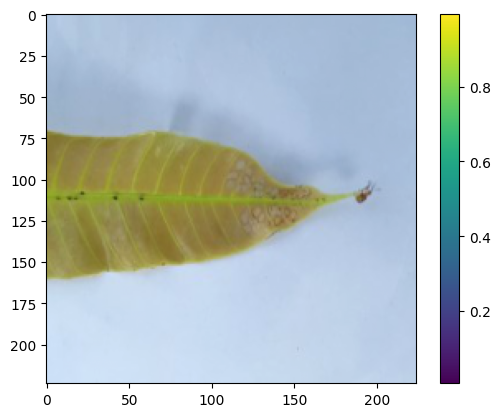

In [ ]:
plt.figure()
plt.imshow(X_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
file_path = '/content/drive/My Drive/y_array.pkl'

with open(file_path, 'rb') as f:
    y_array = pickle.load(f)


In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
# arrays to store training and testing accuracies
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1_scores = []
test_f1_scores = []

training_sizes = np.arange(100, len(train_images) + 1, 100)

for size in training_sizes:

    subset_train_images = train_images[:size]
    subset_train_labels = train_labels[:size]

    naive_bayes_classifier = GaussianNB()

    subset_train_images_flat = subset_train_images.reshape(subset_train_images.shape[0], -1)

    test_images_flat = test_images.reshape(test_images.shape[0], -1)

    naive_bayes_classifier.fit(subset_train_images_flat, subset_train_labels)

    train_predictions = naive_bayes_classifier.predict(subset_train_images_flat)
    test_predictions = naive_bayes_classifier.predict(test_images_flat)

    train_accuracy = accuracy_score(subset_train_labels, train_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    train_precision = precision_score(subset_train_labels, train_predictions, average='macro')
    test_precision = precision_score(test_labels, test_predictions, average='macro')
    train_recall = recall_score(subset_train_labels, train_predictions, average='macro')
    test_recall = recall_score(test_labels, test_predictions, average='macro')
    train_f1 = f1_score(subset_train_labels, train_predictions, average='macro')
    test_f1 = f1_score(test_labels, test_predictions, average='macro')

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

    print(f"Training Accuracy (Size {size}): {train_accuracy:.4f}")
    print(f"Testing Accuracy (Size {size}): {test_accuracy:.4f}")
    print(f"Training Precision (Size {size}): {train_precision:.4f}")
    print(f"Testing Precision (Size {size}): {test_precision:.4f}")
    print(f"Training Recall (Size {size}): {train_recall:.4f}")
    print(f"Testing Recall (Size {size}): {test_recall:.4f}")
    print(f"Training F1 Score (Size {size}): {train_f1:.4f}")
    print(f"Testing F1 Score (Size {size}): {test_f1:.4f}")
    print("=" * 40)






Training Accuracy (Size 100): 0.8400
Testing Accuracy (Size 100): 0.3362
Training Precision (Size 100): 0.8533
Testing Precision (Size 100): 0.4204
Training Recall (Size 100): 0.8605
Testing Recall (Size 100): 0.3458
Training F1 Score (Size 100): 0.8502
Testing F1 Score (Size 100): 0.3303
Training Accuracy (Size 200): 0.7100
Testing Accuracy (Size 200): 0.4325
Training Precision (Size 200): 0.7187
Testing Precision (Size 200): 0.4697
Training Recall (Size 200): 0.7161
Testing Recall (Size 200): 0.4362
Training F1 Score (Size 200): 0.7137
Testing F1 Score (Size 200): 0.4313
Training Accuracy (Size 300): 0.6933
Testing Accuracy (Size 300): 0.5225
Training Precision (Size 300): 0.6983
Testing Precision (Size 300): 0.5400
Training Recall (Size 300): 0.6961
Testing Recall (Size 300): 0.5249
Training F1 Score (Size 300): 0.6950
Testing F1 Score (Size 300): 0.5261
Training Accuracy (Size 400): 0.6825
Testing Accuracy (Size 400): 0.5325
Training Precision (Size 400): 0.6861
Testing Precision (

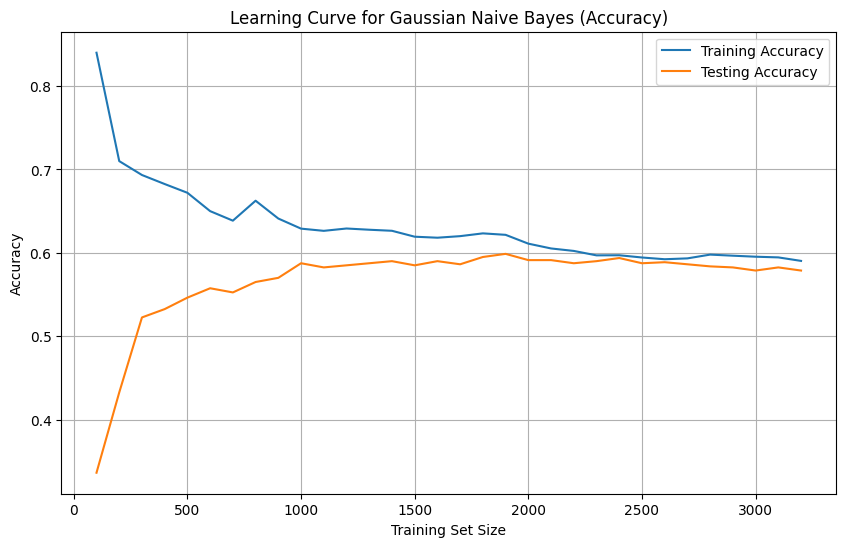

In [ ]:
# learning curve for accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label="Training Accuracy")
plt.plot(training_sizes, test_accuracies, label="Testing Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Gaussian Naive Bayes (Accuracy)")
plt.legend()
plt.grid(True)
plt.show()

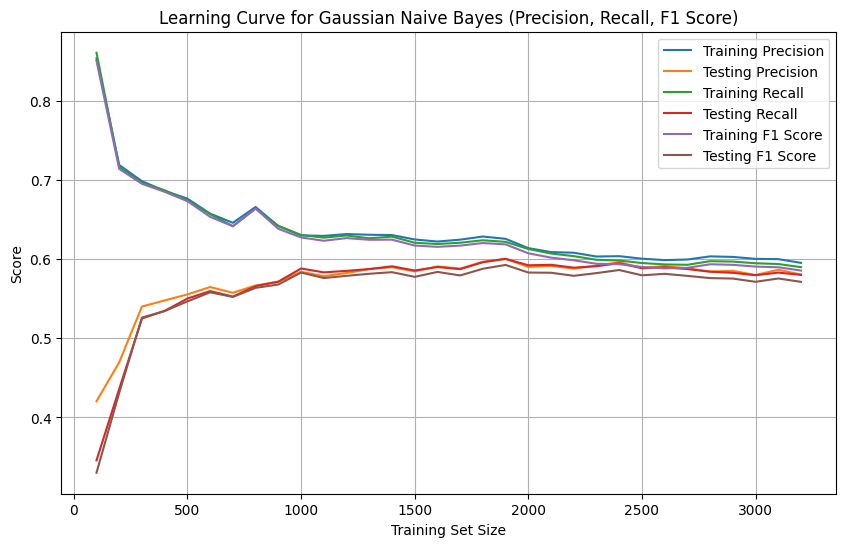

In [ ]:
# learning curve for precision, recall, and F1 score
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_precisions, label="Training Precision")
plt.plot(training_sizes, test_precisions, label="Testing Precision")
plt.plot(training_sizes, train_recalls, label="Training Recall")
plt.plot(training_sizes, test_recalls, label="Testing Recall")
plt.plot(training_sizes, train_f1_scores, label="Training F1 Score")
plt.plot(training_sizes, test_f1_scores, label="Testing F1 Score")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve for Gaussian Naive Bayes (Precision, Recall, F1 Score)")
plt.legend()
plt.grid(True)
plt.show()

Training Accuracy (Size 100): 0.8400
Testing Accuracy (Size 100): 0.3362
Training Precision (Size 100): 0.8533
Testing Precision (Size 100): 0.4204
Training Recall (Size 100): 0.8605
Testing Recall (Size 100): 0.3458
Training F1 Score (Size 100): 0.8502
Testing F1 Score (Size 100): 0.3303
Cross-Validation Accuracy (Size 100): 0.2900
Training Accuracy (Size 200): 0.7100
Testing Accuracy (Size 200): 0.4325
Training Precision (Size 200): 0.7187
Testing Precision (Size 200): 0.4697
Training Recall (Size 200): 0.7161
Testing Recall (Size 200): 0.4362
Training F1 Score (Size 200): 0.7137
Testing F1 Score (Size 200): 0.4313
Cross-Validation Accuracy (Size 200): 0.3250
Training Accuracy (Size 300): 0.6933
Testing Accuracy (Size 300): 0.5225
Training Precision (Size 300): 0.6983
Testing Precision (Size 300): 0.5400
Training Recall (Size 300): 0.6961
Testing Recall (Size 300): 0.5249
Training F1 Score (Size 300): 0.6950
Testing F1 Score (Size 300): 0.5261
Cross-Validation Accuracy (Size 300): 0.

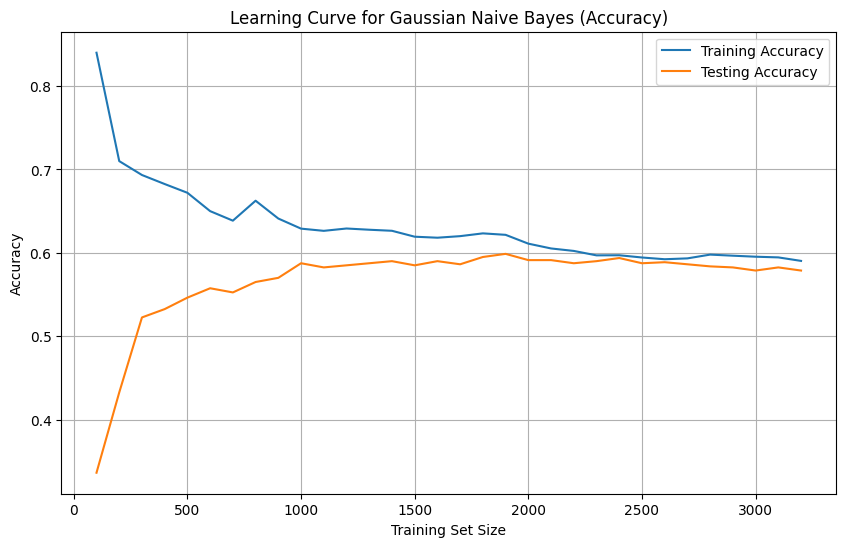

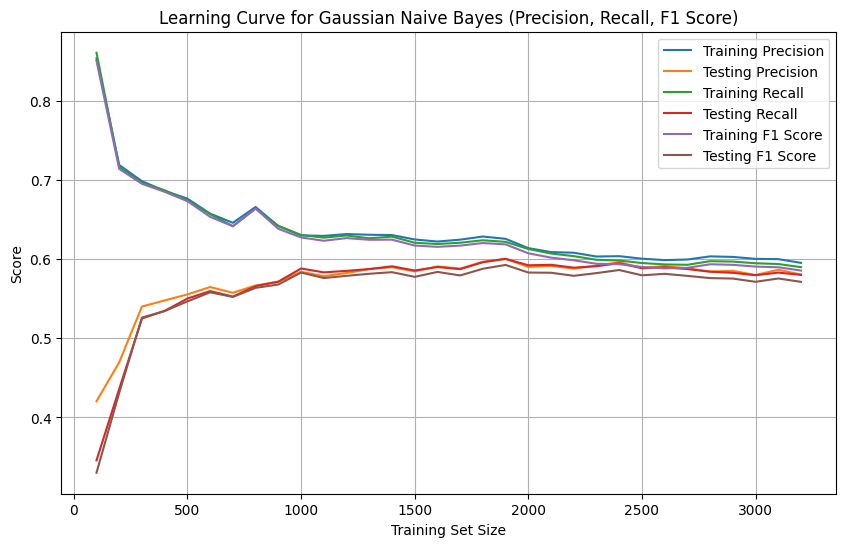

In [ ]:
# Naive Bayes with cross Validation cv=3
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1_scores = []
test_f1_scores = []

training_sizes = np.arange(100, len(train_images) + 1, 100)

for size in training_sizes:

    subset_train_images = train_images[:size]
    subset_train_labels = train_labels[:size]
    naive_bayes_classifier = GaussianNB()
    subset_train_images_flat = subset_train_images.reshape(subset_train_images.shape[0], -1)
    test_images_flat = test_images.reshape(test_images.shape[0], -1)
    naive_bayes_classifier.fit(subset_train_images_flat, subset_train_labels)
    train_predictions = naive_bayes_classifier.predict(subset_train_images_flat)
    test_predictions = naive_bayes_classifier.predict(test_images_flat)
    train_accuracy = accuracy_score(subset_train_labels, train_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    train_precision = precision_score(subset_train_labels, train_predictions, average='macro')
    test_precision = precision_score(test_labels, test_predictions, average='macro')
    train_recall = recall_score(subset_train_labels, train_predictions, average='macro')
    test_recall = recall_score(test_labels, test_predictions, average='macro')
    train_f1 = f1_score(subset_train_labels, train_predictions, average='macro')
    test_f1 = f1_score(test_labels, test_predictions, average='macro')

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)


    print(f"Training Accuracy (Size {size}): {train_accuracy:.4f}")
    print(f"Testing Accuracy (Size {size}): {test_accuracy:.4f}")
    print(f"Training Precision (Size {size}): {train_precision:.4f}")
    print(f"Testing Precision (Size {size}): {test_precision:.4f}")
    print(f"Training Recall (Size {size}): {train_recall:.4f}")
    print(f"Testing Recall (Size {size}): {test_recall:.4f}")
    print(f"Training F1 Score (Size {size}): {train_f1:.4f}")
    print(f"Testing F1 Score (Size {size}): {test_f1:.4f}")
    print("=" * 40)


    cross_val_scores = cross_val_score(naive_bayes_classifier, subset_train_images_flat, subset_train_labels, cv=3, scoring='accuracy')
    print(f"Cross-Validation Accuracy (Size {size}): {np.mean(cross_val_scores):.4f}")
    print("=" * 40)

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label="Training Accuracy")
plt.plot(training_sizes, test_accuracies, label="Testing Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Gaussian Naive Bayes (Accuracy)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_precisions, label="Training Precision")
plt.plot(training_sizes, test_precisions, label="Testing Precision")
plt.plot(training_sizes, train_recalls, label="Training Recall")
plt.plot(training_sizes, test_recalls, label="Testing Recall")
plt.plot(training_sizes, train_f1_scores, label="Training F1 Score")
plt.plot(training_sizes, test_f1_scores, label="Testing F1 Score")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve for Gaussian Naive Bayes (Precision, Recall, F1 Score)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define the parameter grid to search BEST params for SVM
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svm_classifier = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, scoring='accuracy'
)
grid_search.fit(train_images_flat, train_labels)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_svm_classifier = grid_search.best_estimator_
